In [210]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [5]:
sofia_19 = pd.read_csv("sofia_sensors/2019-07_bme280sof.csv")

In [20]:
ttt = pd.DataFrame(sofia_19.groupby("sensor_id").size()).reset_index()

In [24]:
ttt.head()

,sensor_id,0
0,740,17765
1,788,17803
2,1472,17974
3,1764,15966
4,2036,613


In [25]:
ttt[0]

0      17765
1      17803
2      17974
3      15966
4        613
       ...  
345    11527
346     9141
347     6803
348     5859
349     4252
Name: 0, Length: 350, dtype: int64

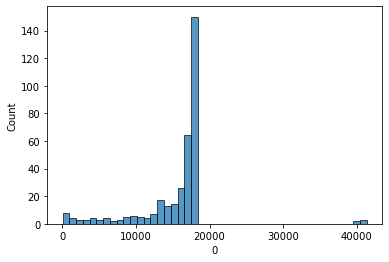

In [26]:
sns.histplot(x = 0, data = ttt)
plt.show()

In [156]:
sofia_19.head()

,Unnamed: 0,sensor_id,location,lat,lon,timestamp,pressure,temperature,humidity
0,8,12795,6461,42.666,23.296,2019-07-01T00:00:00,95324.13,19.67,57.08
1,9,2040,1025,42.686,23.350,2019-07-01T00:00:00,95719.52,16.76,99.15
2,16,23164,11750,42.692,23.362,2019-07-01T00:00:01,95644.41,22.14,48.60
3,23,10097,5087,42.662,23.466,2019-07-01T00:00:02,95803.70,21.00,68.13
4,33,7840,3965,42.634,23.410,2019-07-01T00:00:03,143608.92,16.28,94.20


In [190]:
sofia_sub = sofia_19.head(2000)

In [269]:
pressure_flce = sofia_sub['pressure']
for i in range(sofia_sub.shape[0]):
    if pressure_flce[i] < np.quantile(sofia_sub["pressure"], 0.05):
        pressure_flce[i] = np.quantile(sofia_sub["pressure"], 0.05)
    if pressure_flce[i] > np.quantile(sofia_sub["pressure"], 0.95):
        pressure_flce[i] = np.quantile(sofia_sub["pressure"], 0.95)

In [270]:
pressure_flce = (pressure_flce - min(pressure_flce))/(max(pressure_flce) - min(pressure_flce))# * 255

In [271]:
pressure_flce

0       0.716652
1       0.848900
2       0.823778
3       0.877057
4       1.000000
          ...   
1995    0.687305
1996    0.772921
1997    0.857500
1998    0.911819
1999    0.818483
Name: pressure, Length: 2000, dtype: float64

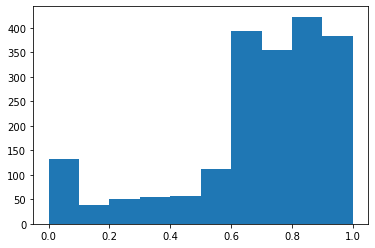

In [272]:
plt.hist(pressure_flce)
plt.show()

In [273]:
hex_colors = []
for i in list(zip(pressure_flce, pressure_flce, pressure_flce)):
    hex_colors.append(colors.to_hex(i))

In [275]:
m = folium.Map(location = [42.69, 23.35], zoom_start = 11)
m

In [276]:
for i in range(sofia_sub.shape[0]):
    folium.CircleMarker([sofia_sub["lat"][i], sofia_sub["lon"][i]], 
                        radius = 4,
                        color = hex_colors[i],
                        fill = True,
                        fill_color =  hex_colors[i], #pressure_flce[i],
                        fill_opacity=1,
                  #popup="<i>sensor {0}</i>".format(sofia_sub["sensor_id"][i]), 
                  tooltip = "<i>pressure : {0} Pa</i>".format(sofia_sub["pressure"][i])).add_to(m)

In [277]:
m

In [133]:
np.min(sofia_19.head(2000)['temperature'])

-145.9

In [134]:
np.max(sofia_19.head(2000)['temperature'])

29.86

In [175]:
np.quantile(sofia_sub["pressure"], 0.99)

148570.0861

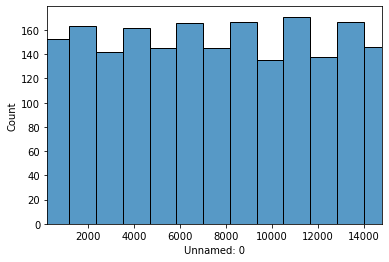

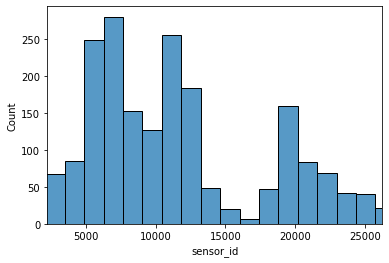

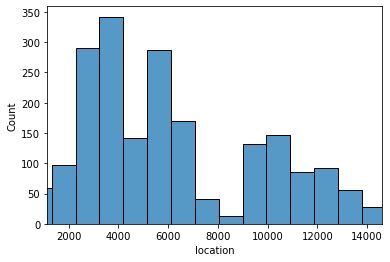

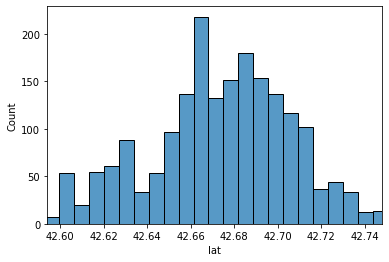

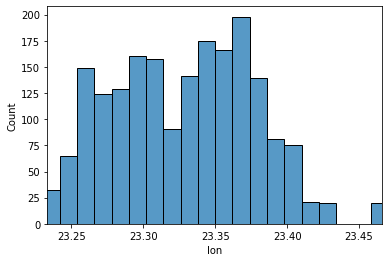

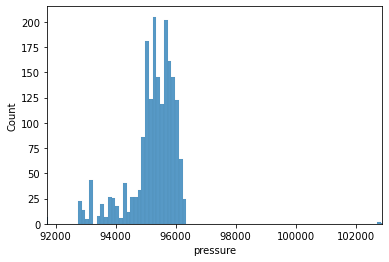

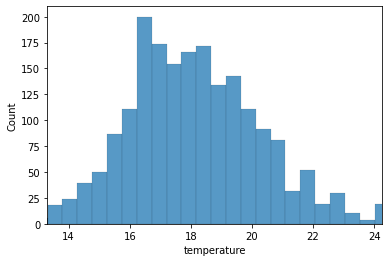

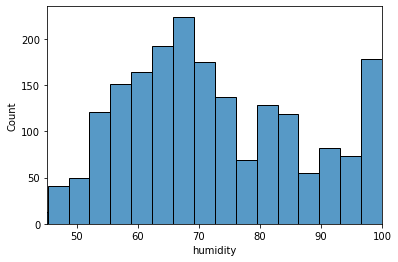

In [177]:
for col in sofia_19.columns:
    if col != "timestamp":
        sns.histplot(x = col, data = sofia_19.head(2000))
        plt.xlim(np.quantile(sofia_sub[col], 0.02), np.quantile(sofia_sub[col], 0.98))
        plt.show()

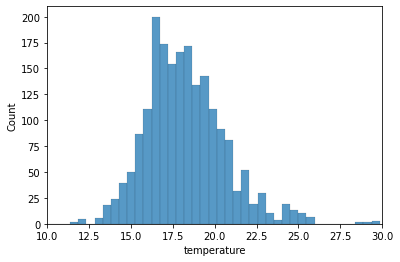

In [137]:
sns.histplot(x = 'temperature', data = sofia_19.head(2000))
plt.xlim(10, 30)
plt.show()

In [ ]:
sofia_19.head(2000)

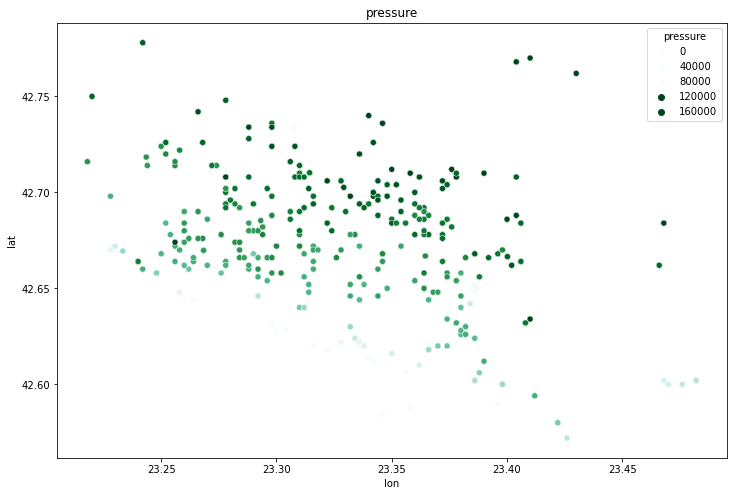

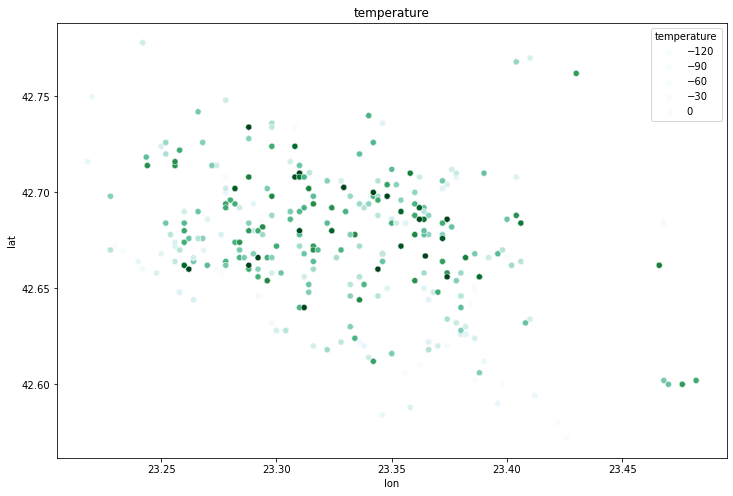

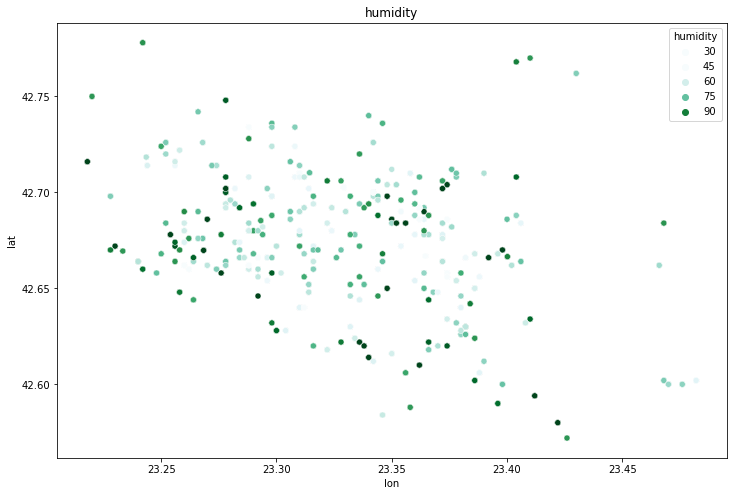

In [184]:
for col in sofia_19.columns:
    if col in ["pressure", "temperature", "humidity"]:
        plt.figure(figsize = (12, 8))
        sns.scatterplot(x = 'lon', y = 'lat', 
                        data = sofia_sub, 
                        hue = col, 
                        hue_norm = (np.quantile(sofia_sub[col], 0.05), np.quantile(sofia_sub[col], 0.95)),
                        palette = "BuGn")
        plt.title(col)
        plt.show()

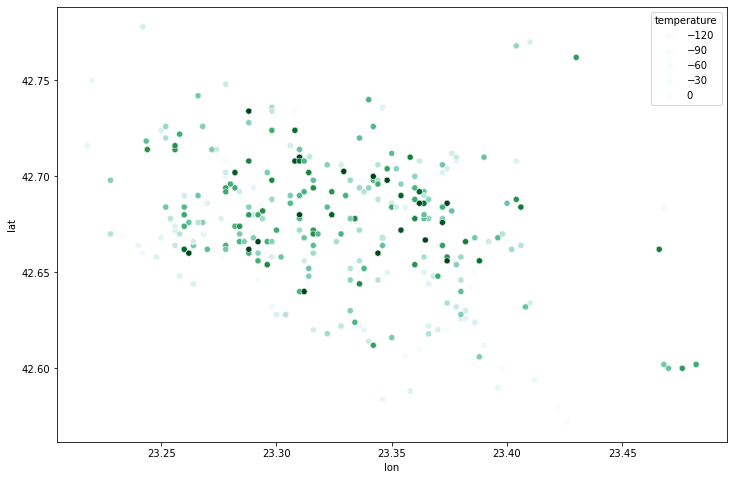

In [178]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'lon', y = 'lat', 
                data = sofia_19.head(2000), 
                hue = 'temperature', 
                hue_norm = (np.quantile(sofia_sub["temperature"], 0.05), np.quantile(sofia_sub["temperature"], 0.95)),
                palette = "BuGn")
plt.show()